In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots

plt.style.use('ieee')

import utils

In [2]:
dfs = []
for path in sorted(Path("../results/cf/").glob("*.csv")):
    df = pd.read_csv(path, delimiter=";", header=None, engine="python")
    dfs.append(df)

In [3]:
df = pd.concat(dfs).reset_index()
df.columns = [
    "cf_idx",
    "name",
    "method",
    "gci_weight",
    "n_clusters",
    "n_buses",
    "n_lines",
    "initial_load",
    "initial_line",
    "lost_load",
    "n_iterations",
    "n_line_failures",
    "n_gen_adjustments",
    "n_alive_buses",
    "n_final_components",
]

# Keep only subset of columns
df = df[
    [
        "cf_idx",
        "name",
        "method",
        "n_clusters",
        "n_buses",
        "n_lines",
        "initial_load",
        "lost_load",
        "n_line_failures",
    ]
]

# df = df[df['gci_weight'].isin([' no_gci', ' neg_weight'])]
names = {
    "original": "OG",
    "warm_start_maximum_congestion": "MCWS",
    "single_stage_power_flow_disruption": "PFD",
    "two_stage_maximum_congestion": "MC2ST",
    "two_stage_power_flow_disruption": "2ST-PFD",
}
df["method"] = df["method"].apply(lambda s: s.strip())
df["method"] = df["method"].map(names)

# Filter cases to the ones with enough lost load in original network and complete results
df["name"] = df["name"].apply(utils.format_case_name)
df = df[
    df["name"].isin(
        [
            "EPRI-39",
            "IEEE-57",
            "GOC-179",
            "IEEE-300",
            "GOC-500",
            "SDET-588",
            "GOC-793",
        ]
    )
]

In [4]:
pd.set_option("display.max_rows", 1000)

data = df.groupby(["name", "method", "n_clusters"]).mean()
data.sort_values(by="n_buses").sort_index()

cf_idx  n_buses  n_lines  initial_load  \
name     method  n_clusters                                           
EPRI-39  2ST-PFD 2             21.5     39.0     44.0   6254.230000   
                 3             21.5     39.0     44.0   6254.230000   
                 4             21.0     39.0     43.0   6254.230000   
         MC2ST   2             21.5     39.0     44.0   6254.230000   
                 3             21.5     39.0     44.0   6254.230000   
                 4             21.0     39.0     43.0   6254.230000   
         MCWS    2             21.0     39.0     43.0   6254.230000   
                 3             20.5     39.0     42.0   6254.230000   
                 4             20.5     39.0     42.0   6254.230000   
         OG      1             22.5     39.0     46.0   6254.230000   
         PFD     2             21.5     39.0     44.0   6254.230000   
                 3             21.5     39.0     44.0   6254.230000   
                 4             21.5     39.0     44.0   6254.230000   
GOC-179  2ST-PFD 2            129.0    179.0    259.0  33940.500000   
                 3            126.5    179.0    254.0  33940.500000   
                 4            125.5    179.0    252.0  33940.500000   
         MC2ST   2            129.0    179.0    259.0  33940.500000   
                 3            126.5    179.0    254.0  33940.500000   
                 4            125.5    179.0    252.0  33940.500000   
         MCWS    2            128.0    179.0    257.0  33940.500000   
                 3            123.0    179.0    247.0  33940.500000   
                 4            122.0    179.0    245.0  33940.500000   
         OG      1            131.0    179.0    263.0  33940.500000   
         PFD     2            129.0    179.0    259.0  33940.500000   
                 3            126.5    179.0    254.0  33940.500000   
                 4            125.5    179.0    252.0  33940.500000   
GOC-500  2ST-PFD 2            355.5    500.0    712.0  17772.920734   
                 3            353.0    500.0    707.0  17772.920734   
                 4            349.5    500.0    700.0  17772.920734   
         MC2ST   2            355.5    500.0    712.0  17772.920734   
                 3            353.0    500.0    707.0  17772.920734   
                 4            349.5    500.0    700.0  17772.920734   
         MCWS    2            355.5    500.0    712.0  17772.920734   
                 3            352.5    500.0    706.0  17772.920734   
                 4            349.0    500.0    699.0  17772.920734   
         OG      1            364.0    500.0    729.0  17772.920734   
         PFD     2            355.5    500.0    712.0  17772.920734   
                 3            352.5    500.0    706.0  17772.920734   
                 4            349.0    500.0    699.0  17772.920734   
GOC-793  2ST-PFD 2            442.5    793.0    886.0  13218.060000   
                 3            433.5    793.0    868.0  13218.060000   
                 4            432.5    793.0    866.0  13218.060000   
         MC2ST   2            442.5    793.0    886.0  13218.060000   
                 3            433.5    793.0    868.0  13218.060000   
                 4            432.5    793.0    866.0  13218.060000   
         MCWS    2            441.5    793.0    884.0  13218.060000   
                 3            429.5    793.0    860.0  13218.060000   
                 4            428.5    793.0    858.0  13218.060000   
         OG      1            456.0    793.0    913.0  13218.060000   
         PFD     2            442.5    793.0    886.0  13218.060000   
                 3            433.5    793.0    868.0  13218.060000   
                 4            433.5    793.0    868.0  13218.060000   
IEEE-300 2ST-PFD 2            199.5    300.0    400.0  23848.950000   
                 3            197.0    300.0    395.0  23848.950000   
                 4            191.5    300.0    384.0

In [5]:
def calculate_relative_values(df, numerator, denominator):
    initial_values = df[denominator].fillna(method="pad")
    return np.round((df[numerator] / initial_values) * 100, 2)

# Select the relevant columns
df = data.unstack(level=1)
methods = ["MC2ST", "MCWS", "PFD", "2ST-PFD", "OG"]
metrics = ["n_lines", "initial_load", "lost_load", "n_line_failures"]
columns = [(metric, method) for metric in metrics for method in methods]
df = df[columns]

# Calculate relative lost loads
for method in methods:
    df[f"lost_load_{method}"] = df[("lost_load", method)]
    df[f"relative_lost_load_{method}"] = calculate_relative_values(
        df, 
        f"lost_load_{method}", 
        ("initial_load", "OG")
    )

In [6]:
initial_load = df['initial_load'].groupby("name").max()["OG"].values
lost_loads = []
lost_load_cols = [("lost_load", "MCWS"), ("lost_load", "MC2ST"), ("lost_load", "PFD"), ("lost_load", "2ST-PFD"), ("lost_load", "OG")]

for idx in range(5):
    _lost_load = df[[lost_load_cols[idx]]].dropna().reset_index(level=[0,1])
    _lost_load.columns = ['name', 'n_clusters', 'lost_load']
    _lost_load = _lost_load.groupby('name')['lost_load'].mean()
    lost_loads.append(_lost_load.values / initial_load)

res = pd.DataFrame(lost_loads).T * 100
res.columns = ["MWCS", "MC2ST", "PFD", "2ST-PFD", "OG"]
res.index = df.index.get_level_values(0).unique()
res

,MWCS,MC2ST,PFD,2ST-PFD,OG
name,,,,,
EPRI-39,17.596344,15.081771,11.054036,17.023731,21.280118
GOC-179,4.907084,4.014611,1.909264,1.909264,3.892777
GOC-500,6.881252,8.339292,6.881252,6.496030,6.275747
GOC-793,46.317392,46.216178,49.597229,48.261353,48.590094
IEEE-300,9.769256,9.895905,9.769256,9.804195,34.759798
IEEE-57,5.825274,16.831867,16.711030,16.609327,6.287676
SDET-588,15.486892,16.488777,15.627057,15.627057,26.626439


In [7]:
# Sort by network size
res['index_as_column'] = res.index
res['key_func_value'] = res['index_as_column'].apply(lambda s: int(s.split('-')[-1])) # network size
res.sort_values('key_func_value', inplace=True)
del res['key_func_value']
del res['index_as_column']

In [8]:
res = res[["OG", "PFD", "2ST-PFD", "MWCS", "MC2ST"]]

In [9]:
res.mean()

OG         21.101807
PFD        15.935589
2ST-PFD    16.532994
MWCS       15.254785
MC2ST      16.695486
dtype: float64

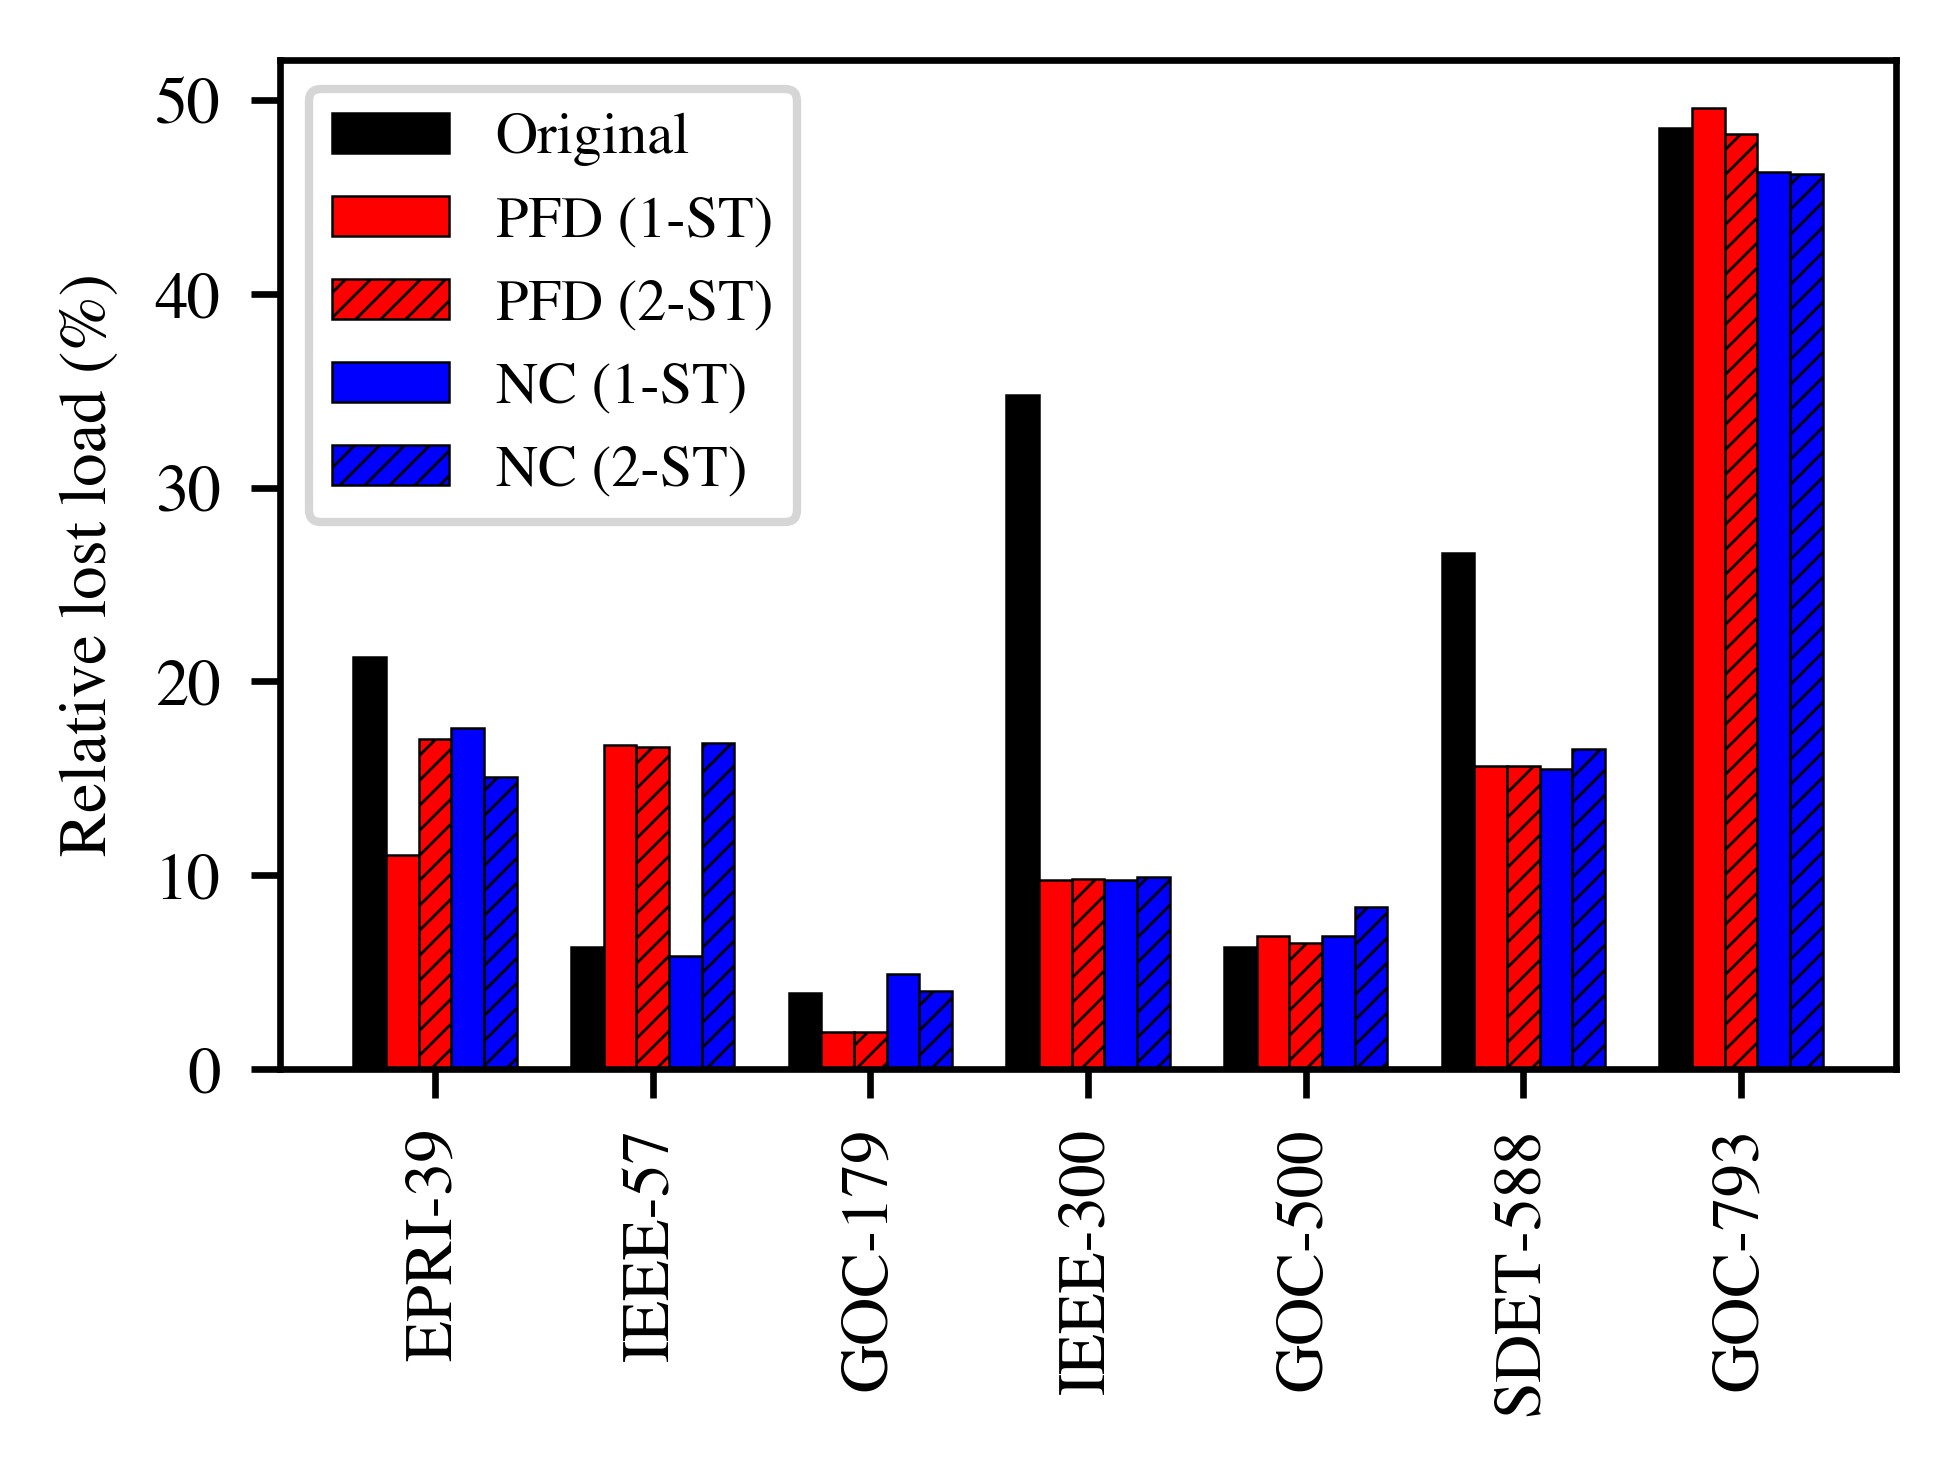

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot setup
width = 0.15
x = np.arange(len(res.index))

plt.rcParams['hatch.linewidth'] = 0.33  # Make hatch lines thinner

linewidth = 0.3
# Create bars
plt.bar(x - 2*width, res['OG'], width, color='black', label='Original', edgecolor='black', linewidth=linewidth)
plt.bar(x - width, res['PFD'], width, color='red', label='PFD (1-ST)', edgecolor='black', linewidth=linewidth)
plt.bar(x, res['2ST-PFD'], width, color='red', hatch='////////', label='PFD (2-ST)', edgecolor='black', linewidth=linewidth)  # More slashes = denser pattern
plt.bar(x + width, res['MWCS'], width, color='blue', label='NC (1-ST)', edgecolor='black', linewidth=linewidth)
plt.bar(x + 2*width, res['MC2ST'], width, color='blue', hatch='////////', label='NC (2-ST)', edgecolor='black', linewidth=linewidth)

# Customize
plt.xticks(x, res.index, rotation=90)
plt.legend(prop={'size': 7})
plt.ylabel("Relative lost load (%)")
plt.tight_layout()

plt.savefig("../figures/relative-lost-load-rev.pdf")